In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
data_dir = 'data/'
train_file = data_dir + 'train.csv'
test_file = data_dir + 'test.csv'

train_data = pd.read_csv(train_file, delimiter='\t', header=None, names=['label', 'text'])
test_data = pd.read_csv(test_file, delimiter='\t', header=None, names=['text'])

In [3]:
print(train_data.shape)
train_data.head()

(6918, 2)


,label,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


class balance (1 vs 0)%:  0.5699624168834924


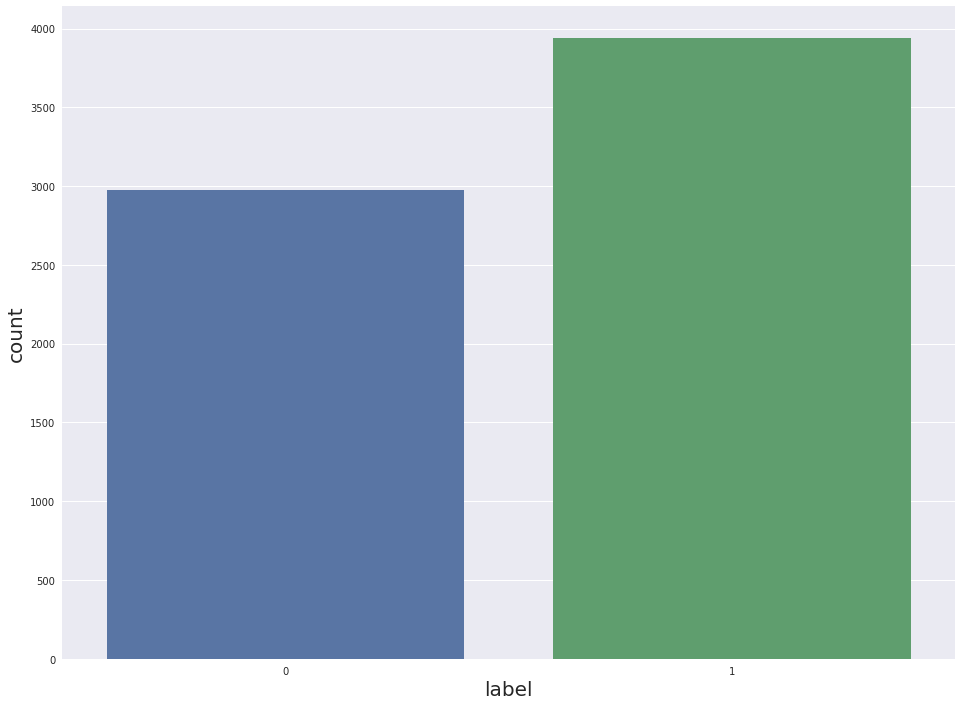

In [4]:
print('class balance (1 vs 0)%: ', train_data.label.mean())

plt.figure(figsize=(16, 12))
sns.countplot(x=train_data.label)
plt.xlabel('label', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.show()

In [5]:
train_data['lens'] = train_data.text.str.len()
print('mean: {}, std: {}, max: {}'.format(train_data.lens.mean(), train_data.lens.std(), train_data.lens.max()))

mean: 61.686036426712924, std: 76.77430980923711, max: 4849


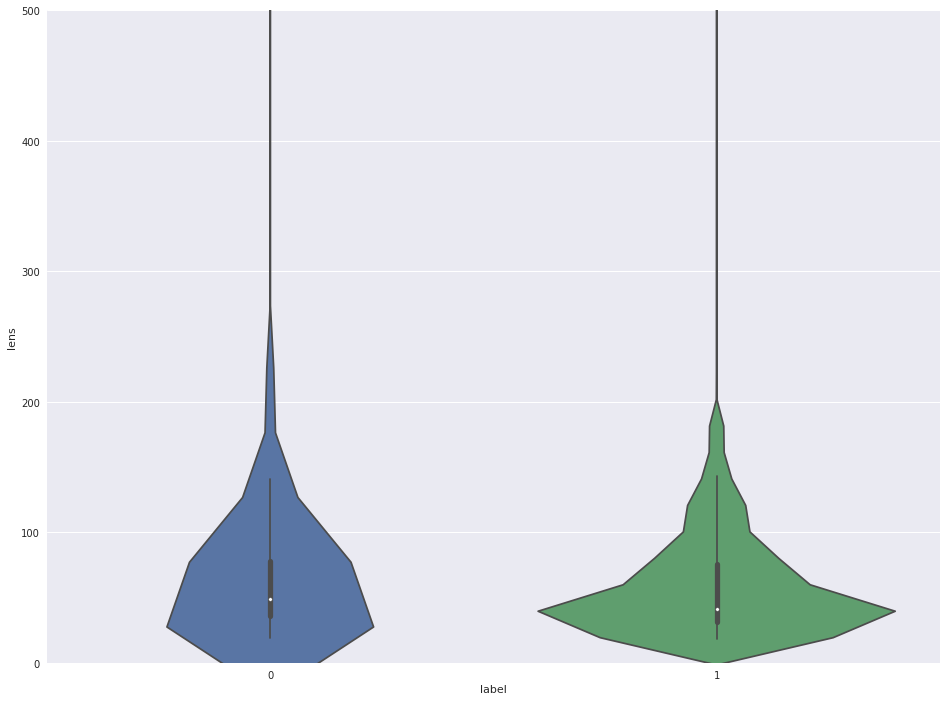

In [6]:
plt.figure(figsize=(16, 12))
sns.violinplot(y='lens', x='label', data=train_data)
plt.ylim((0, 500))
plt.show()

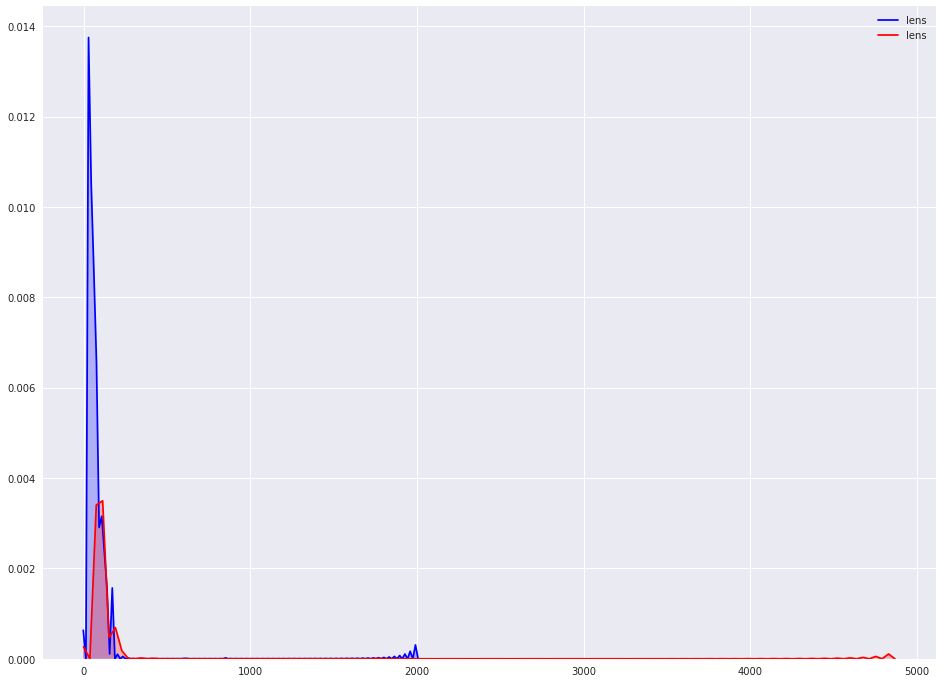

In [7]:
plt.figure(figsize=(16, 12))
sns.kdeplot(data=train_data[train_data.label==1].lens, color='b', shade=True)
sns.kdeplot(data=train_data[train_data.label==0].lens, color='r', shade=True)
plt.show()

In [9]:
train_data['words'] = train_data.text.str.split().str.len()
print('mean: {}, std: {}, max: {}'.format(train_data.words.mean(), train_data.words.std(), train_data.words.max()))

mean: 11.1697022260769, std: 14.64424037441969, max: 944


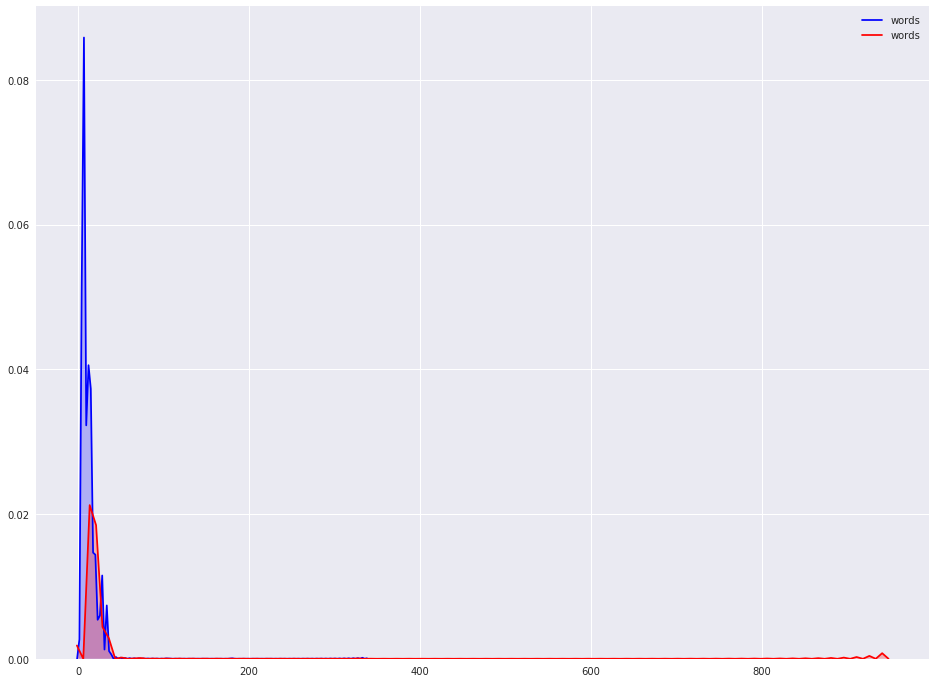

In [10]:
plt.figure(figsize=(16, 12))
sns.kdeplot(data=train_data[train_data.label==1].words, color='b', shade=True)
sns.kdeplot(data=train_data[train_data.label==0].words, color='r', shade=True)
plt.show()

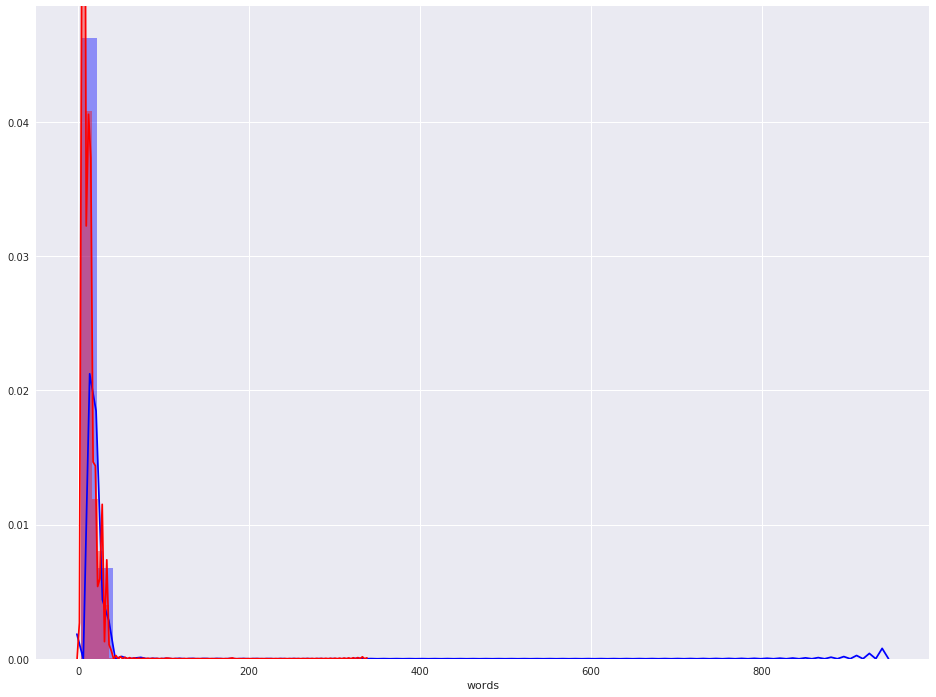

In [12]:
plt.figure(figsize=(16, 12))
sns.distplot(train_data[train_data.label == 0].words, color='b')
sns.distplot(train_data[train_data.label == 1].words, color='r')
plt.show()

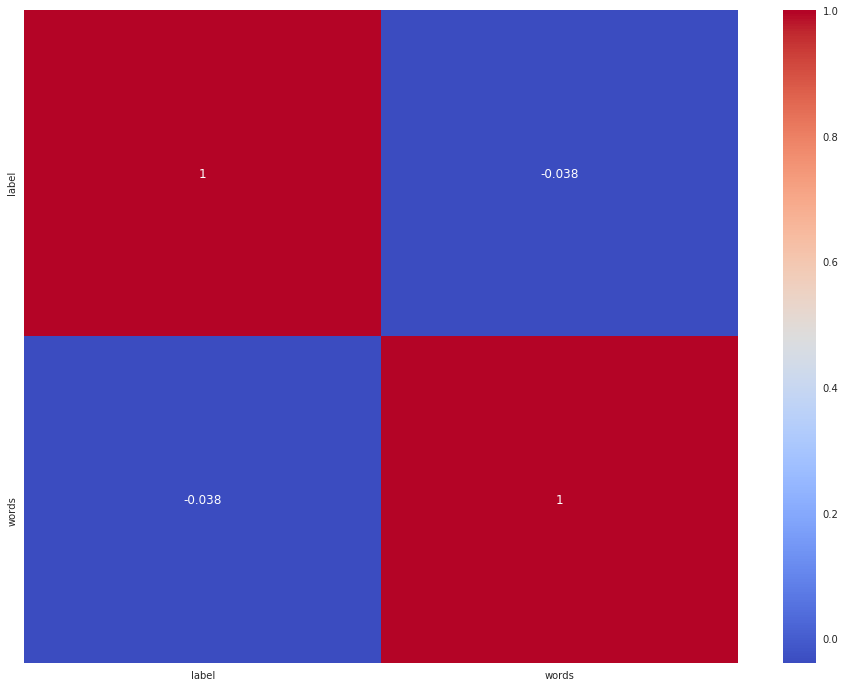

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(train_data[['label', 'words']].corr(), annot=True, cmap='coolwarm')
plt.show()